# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
pip install citipy

     |████████████████████████████████| 557 kB 4.2 MB/s 
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=6b4e789a1045448dde08266175684ddf377c03ce4c47bd687f5f5e855e812fd9
  Stored in directory: /root/.cache/pip/wheels/72/ae/63/5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [7]:
#!unzip Python-APIsHW.zip
%cd Python-APIsHW/Instructions/starter_code

/content/Python-APIsHW/Instructions/starter_code


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [13]:
for i, city in enumerate(cities):
    print(i, city)

0 hobyo
1 coquimbo
2 kaitangata
3 chuy
4 kanniyakumari
5 bethel
6 kyzyl-suu
7 east london
8 chokurdakh
9 jamestown
10 busselton
11 paulo ramos
12 lavrentiya
13 ribeira grande
14 nanortalik
15 hilo
16 yellowknife
17 derzhavinsk
18 sinnamary
19 vaini
20 qaqortoq
21 svetlyy
22 saint-philippe
23 new norfolk
24 victoria
25 ushuaia
26 bluff
27 thinadhoo
28 broome
29 constitucion
30 luderitz
31 berbera
32 cape town
33 alofi
34 piribebuy
35 port alfred
36 punta arenas
37 puerto ayora
38 mataura
39 dikson
40 pangnirtung
41 praia da vitoria
42 cayenne
43 baruun-urt
44 lebu
45 sorong
46 amderma
47 hami
48 castro
49 kapaa
50 bredasdorp
51 mango
52 whitehorse
53 taolanaro
54 albany
55 tuktoyaktuk
56 coihaique
57 rocha
58 mandalgovi
59 tuatapere
60 harper
61 ponta do sol
62 upernavik
63 launceston
64 codrington
65 camocim
66 leningradskiy
67 krasnoselkup
68 bambous virieux
69 huilong
70 sironj
71 avarua
72 hambantota
73 kyabram
74 georgetown
75 longyearbyen
76 arraial do cabo
77 paita
78 bengkulu
79

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
#base url
#url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=(weather_api_key)&q=" #+ city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#list of city data
cityname=[]
Lat = []
Long = []
temp = []
Humidity = []
Clouds = []
Speed = []
Date = [ ]
#grouping variables
set_count =1 # group
record = 1 # record within the group

print ("Beginning Data Retrieval")
print("-----------------------")
      
for i, city in enumerate(cities):
    #group the cities in sets of 50
    if(i % 50 == 0 and i >= 50):
        set_count += 1 # make a new group
        record = 0 #reset the count of records in the new group
      
    # outpout the record and group and name of the city being processed from the list of cities
    #print(f"Processing Record {record} of Set {set_count} | {city}")
    
    #increase the record count within the set
   
   
    # create a url that includes the city
    cityURL = query_url + city
    
    # call the openweather API and make a request
    try:
        
        cityweather = requests.get(cityURL).json()
        #print(cityweather)
        
        lat = cityweather["coord"]["lat"]
        #print(lat)
        lng = cityweather["coord"]["lon"]
        #print(lng)
        maxtem = cityweather["main"]["temp_max"]
        #print(maxtem)
        humidity = cityweather["main"]["humidity"]
        #print(humidity)
        cloudiness = cityweather["clouds"]["all"]
        #print(cloudiness)
        windspeed = cityweather["wind"]["speed"]
        #print(windspeed)
        date = cityweather["dt"]
        #print(date)
       
        cityname.append(city)
        
        Lat.append(lat)
       
        Long.append(lng)
       
        temp.append(maxtem)
        
        Humidity.append(humidity)
       
        Speed.append(windspeed)
        
        Clouds.append(cloudiness)
       
        Date.append(date)
       
        print(f"Processing Record {record} of Set {set_count} | {city}") 
        record+=1
        
    except:
        print(f"{city} not found. Skipping....")
        
  

Beginning Data Retrieval
-----------------------
Processing Record 1 of Set 1 | hobyo
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | kanniyakumari
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | kyzyl-suu
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | paulo ramos
Processing Record 13 of Set 1 | lavrentiya
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | derzhavinsk
Processing Record 19 of Set 1 | sinnamary
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | svetlyy
Processing Record 23 of Set 1 | saint-ph

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather = {'City': cityname , 	'Lat' : Lat , 	'Lng' :Long	,'Max Temp':temp , 
           'Humidity' :Humidity , 	'Cloudiness':Clouds , 'Wind Speed' : Speed,	'Country Date' : Date}
data = pd.DataFrame(weather)
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
0,hobyo,5.3505,48.5268,83.07,62,44,29.48,1627112543
1,coquimbo,-29.9533,-71.3436,51.53,93,90,1.14,1627112544
2,kaitangata,-46.2817,169.8464,45.93,71,100,6.35,1627112546
3,chuy,-33.6971,-53.4616,54.64,91,5,4.32,1627112546
4,kanniyakumari,8.0833,77.5667,82.17,74,96,20.33,1627112548


In [16]:
data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,18.935953,16.463671,69.931333,67.914530,51.745299,8.331812,1.627113e+09
std,33.851545,87.867517,14.585528,21.183467,41.011547,6.155845,1.687465e+02
min,-54.800000,-175.200000,33.330000,8.000000,0.000000,0.000000,1.627112e+09
25%,-8.836800,-59.533300,60.030000,53.000000,5.000000,3.960000,1.627113e+09
50%,22.285500,19.776000,71.130000,71.000000,54.000000,6.910000,1.627113e+09
75%,49.387800,92.135800,80.980000,86.000000,95.000000,10.890000,1.627113e+09
max,78.218600,179.316700,106.110000,100.000000,100.000000,37.980000,1.627113e+09


In [17]:
data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
city_data = data

In [19]:
#  Get the indices of cities that have humidity over 100%.
indices = city_data[city_data['Humidity']>= 100].index

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(list(indices), inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Maxt Temperature')

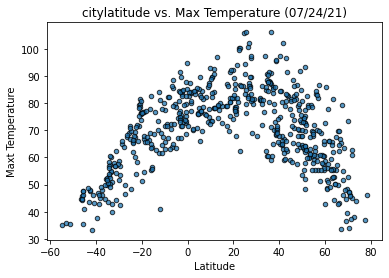

In [22]:
date = dt.date.today().strftime("%m/%d/%y")
plt.scatter(clean_city_data['Lat'] , clean_city_data['Max Temp'] , marker = 'o' , edgecolors = 'k' ,s = 20 , alpha = 0.75)
plt.title('citylatitude vs. Max Temperature ({})'.format(date))
plt.xlabel('Latitude')
plt.ylabel('Maxt Temperature')

Temperature are on the lower side if the latitude is extreme lower or extreme higher. The temperature can vary from normal to high if we have latitude between -40 and 60

## Latitude vs. Humidity Plot

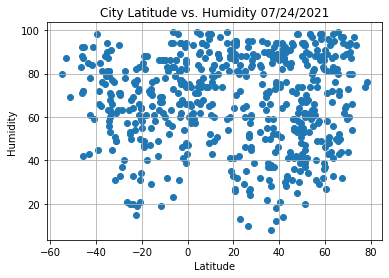

In [34]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()


There is no defined pattern we find when it comes to plotting latitude and humidity in this dataset. According to the plot, we can have variety of humidity levels irrespective of latitude


## Latitude vs. Cloudiness Plot

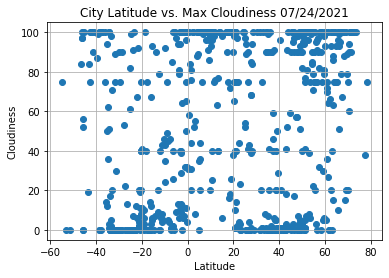

In [35]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

Some of the areas are very cloudy and some of them are just not very cloudy. There is very few cities having arbitrary cloudiness. They don't really depend upon latitude according to this plot

## Latitude vs. Wind Speed Plot

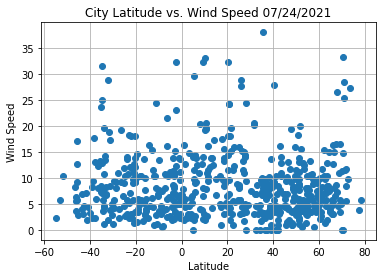

In [36]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

Most of the cities have windspeed in the range of 5 to 20 mph. There are very few cities having windspeed greater than 20 mph. 

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
## Initializing linear regression model
regr = LinearRegression()
## segregating northern hemisphere and southern hemisphere data
north_data = clean_city_data[clean_city_data['Lat']>=0]
south_data = clean_city_data[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Coefficients: 
 [-0.44865677]
Mean squared error: 118.93
Coefficient of determination: 0.40


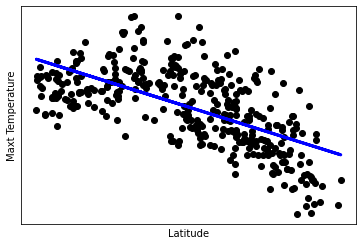

<Figure size 432x288 with 0 Axes>

In [75]:
# Train the model using the data
regr.fit(pd.DataFrame(north_data['Lat']), north_data['Max Temp'])
y_pred = regr.predict(pd.DataFrame(north_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(north_data['Max Temp'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(north_data['Max Temp'], y_pred))

# Plot outputs
plt.scatter(north_data['Lat'], north_data['Max Temp'],  color='black')
plt.plot(north_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Maxt Temperature')
plt.show()

plt.savefig("../output_data/Regression_LatitudeVsTemperature_NorthernHemisphere.png")

It's a decreasing trend as the latitude get's higher the max temperature starts to get lower. Moreever they both are inversly proportional to each other having decreasing coefficient of 0.40. Regression is modeling this trend by plotting stright line with the equation Temperature=m*Latitude with it's slope being -0.44. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Coefficients: 
 [0.81554134]
Mean squared error: 60.72
Coefficient of determination: 0.68


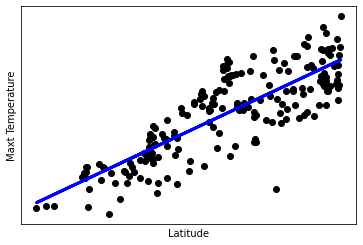

<Figure size 432x288 with 0 Axes>

In [76]:
# Train the model using the data
regr.fit(pd.DataFrame(south_data['Lat']), south_data['Max Temp'])
y_pred = regr.predict(pd.DataFrame(south_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(south_data['Max Temp'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(south_data['Max Temp'], y_pred))

# Plot outputs
plt.scatter(south_data['Lat'], south_data['Max Temp'],  color='black')
plt.plot(south_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Maxt Temperature')
plt.show()
plt.savefig("../output_data/Regression_LatitudeVsTemperature_SouthernHemisphere.png")

It's a increasing trend as the latitude get's higher the max temperature starts get bigger. Moreever; they both are directly proportional to each other having increasing coefficient of 0.81. Regression is modeling this trend by plotting stright line with the equation Temperature=m*Latitude with it's slope being 0.81. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Coefficients: 
 [-0.05201902]
Mean squared error: 482.56
Coefficient of determination: 0.00


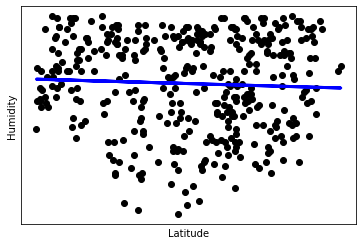

<Figure size 432x288 with 0 Axes>

In [77]:
# Train the model using the data
regr.fit(pd.DataFrame(north_data['Lat']), north_data['Humidity'])
y_pred = regr.predict(pd.DataFrame(north_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(north_data['Humidity'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(north_data['Humidity'], y_pred))

# Plot outputs
plt.scatter(north_data['Lat'], north_data['Humidity'],  color='black')
plt.plot(north_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("../output_data/Regression_LatitudeVsHumidity_NorthernHemisphere.png")

Regression is modeling arbitrary trend by plotting stright line with the equation Humidity=m*Latitude with it's slope being -0.05.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Coefficients: 
 [-0.03470111]
Mean squared error: 354.33
Coefficient of determination: 0.00


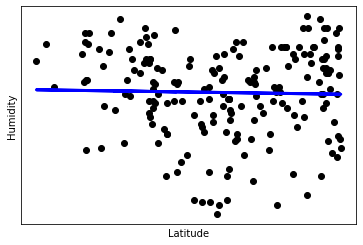

<Figure size 432x288 with 0 Axes>

In [78]:
# Train the model using the data
regr.fit(pd.DataFrame(south_data['Lat']), south_data['Humidity'])
y_pred = regr.predict(pd.DataFrame(south_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(south_data['Humidity'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(south_data['Humidity'], y_pred))

# Plot outputs
plt.scatter(south_data['Lat'], south_data['Humidity'],  color='black')
plt.plot(south_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("../output_data/Regression_LatitudeVsHumidity_SouthernHemisphere.png")

Regression is modeling arbitrary trend by plotting stright line with the equation Humidity=m*Latitude with it's slope being -0.034.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Coefficients: 
 [0.04365371]
Mean squared error: 1651.60
Coefficient of determination: 0.00


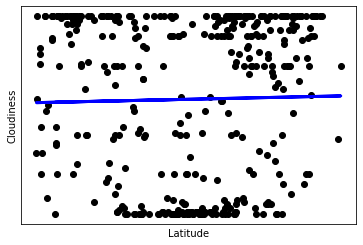

<Figure size 432x288 with 0 Axes>

In [79]:
# Train the model using the data
regr.fit(pd.DataFrame(north_data['Lat']), north_data['Cloudiness'])
y_pred = regr.predict(pd.DataFrame(north_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(north_data['Cloudiness'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(north_data['Cloudiness'], y_pred))

# Plot outputs
plt.scatter(north_data['Lat'], north_data['Cloudiness'],  color='black')
plt.plot(north_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../output_data/Regression_LatitudeVsCloudiness_NorthernHemisphere.png")

Regression is modeling arbitrary trend by plotting stright line with the equation Humidity=m*Latitude with it's slope being 0.04.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Coefficients: 
 [-0.24394073]
Mean squared error: 1500.77
Coefficient of determination: 0.01


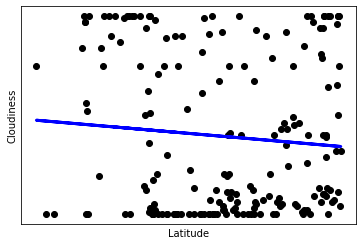

<Figure size 432x288 with 0 Axes>

In [80]:

# Train the model using the data
regr.fit(pd.DataFrame(south_data['Lat']), south_data['Cloudiness'])
y_pred = regr.predict(pd.DataFrame(south_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(south_data['Cloudiness'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(south_data['Cloudiness'], y_pred))

# Plot outputs
plt.scatter(south_data['Lat'], south_data['Cloudiness'],  color='black')
plt.plot(south_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../output_data/Regression_LatitudeVsCloudiness_SouthernHemisphere.png")

Regression is modeling arbitrary trend by plotting stright line with the equation Humidity=m*Latitude with it's slope being -0.243.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Coefficients: 
 [-0.03105668]
Mean squared error: 39.66
Coefficient of determination: 0.01


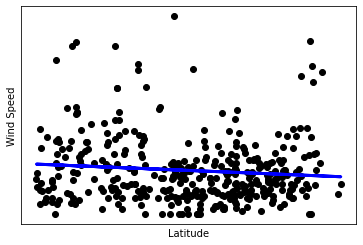

<Figure size 432x288 with 0 Axes>

In [81]:
# Train the model using the data
regr.fit(pd.DataFrame(north_data['Lat']), north_data['Wind Speed'])
y_pred = regr.predict(pd.DataFrame(north_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(north_data['Wind Speed'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(north_data['Wind Speed'], y_pred))

# Plot outputs
plt.scatter(north_data['Lat'], north_data['Wind Speed'],  color='black')
plt.plot(north_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("../output_data/Regression_LatitudeVsWindSpeed_NorthernHemisphere.png")

Regression is modeling arbitrary trend by plotting stright line with the equation Wind Speed=m*Latitude with it's slope being -0.03.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Coefficients: 
 [-0.00935512]
Mean squared error: 33.51
Coefficient of determination: 0.00


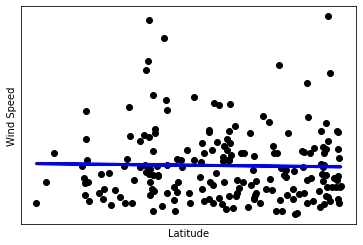

<Figure size 432x288 with 0 Axes>

In [82]:
# Train the model using the data
regr.fit(pd.DataFrame(south_data['Lat']), south_data['Wind Speed'])
y_pred = regr.predict(pd.DataFrame(south_data['Lat']))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(south_data['Wind Speed'], y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(south_data['Wind Speed'], y_pred))

# Plot outputs
plt.scatter(south_data['Lat'], south_data['Wind Speed'],  color='black')
plt.plot(south_data['Lat'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("../output_data/Regression_LatitudeVsWindSpeed_SouthernHemisphere.png")

Regression is modeling arbitrary trend by plotting stright line with the equation Wind Speed=m*Latitude with it's slope being -0.009.